In [5]:
from fastai.vision import *

In [55]:
path = Path('data/badminton')
dest = path
dest.mkdir(parents=True, exist_ok=True)

In [56]:
path.ls()

[PosixPath('data/badminton/badminton.csv')]

In [57]:
classes = ['cricket','football','badminton']
file='badminton.csv'
file

'badminton.csv'

In [58]:
download_images(path/file, dest, max_pics=200)

Error https://previews.123rf.com/images/equinoxvect/equinoxvect1505/equinoxvect150500019/40618504-badminton-competition-single-match-flat-isometric.jpg HTTPSConnectionPool(host='previews.123rf.com', port=443): Max retries exceeded with url: /images/equinoxvect/equinoxvect1505/equinoxvect150500019/40618504-badminton-competition-single-match-flat-isometric.jpg (Caused by ProxyError('Cannot connect to proxy.', timeout('timed out',)))
Error https://images.nbcolympics.com/www.nbcolympics.com/field_image/19August2016/819_bd_5574_msfmasvchn.jpg HTTPSConnectionPool(host='images.nbcolympics.com', port=443): Read timed out. (read timeout=4)
Error https://stillmed.olympic.org/media/Images/OlympicOrg/News/2016/08/20/2016-08-20-marin-thumbnail.jpg HTTPSConnectionPool(host='stillmed.olympic.org', port=443): Read timed out. (read timeout=4)


In [65]:
path = Path('data')
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cricket


cannot identify image file <_io.BufferedReader name='data/cricket/00000178.jpg'>
cannot identify image file <_io.BufferedReader name='data/cricket/00000055.jpg'>
tuple index out of range
cannot identify image file <_io.BufferedReader name='data/cricket/00000103.png'>
cannot identify image file <_io.BufferedReader name='data/cricket/00000052.jpg'>
cannot identify image file <_io.BufferedReader name='data/cricket/00000001.jpg'>
cannot identify image file <_io.BufferedReader name='data/cricket/00000164.jpg'>
football


cannot identify image file <_io.BufferedReader name='data/football/00000194.jpg'>
cannot identify image file <_io.BufferedReader name='data/football/00000009.jpg'>
cannot identify image file <_io.BufferedReader name='data/football/00000177.png'>
cannot identify image file <_io.BufferedReader name='data/football/00000021.jpg'>
cannot identify image file <_io.BufferedReader name='data/football/00000113.jpg'>
cannot identify image file <_io.BufferedReader name='data/football/00000145.jpg'>
cannot identify image file <_io.BufferedReader name='data/football/00000062.jpg'>
cannot identify image file <_io.BufferedReader name='data/football/00000006.jpg'>
cannot identify image file <_io.BufferedReader name='data/football/00000199.jpg'>
badminton


/usr/lib/python3/dist-packages/PIL/Image.py:971: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/badminton/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='data/badminton/00000125.jpg'>
cannot identify image file <_io.BufferedReader name='data/badminton/00000086.jpg'>
cannot identify image file <_io.BufferedReader name='data/badminton/00000103.jpg'>


In [70]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=128, num_workers=4).normalize(imagenet_stats)

In [71]:
data.classes

['badminton', 'cricket', 'football']

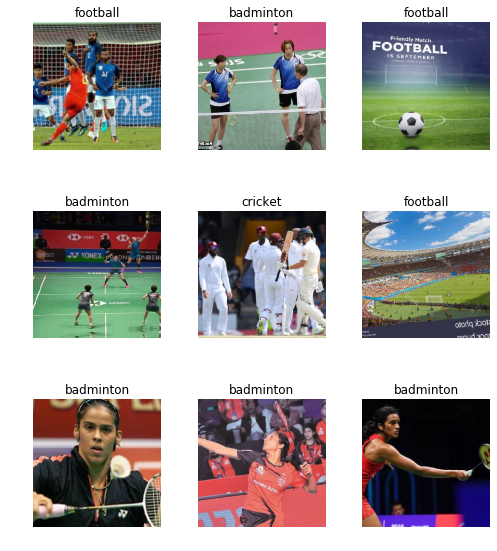

In [72]:
data.show_batch(rows=3, figsize=(7,8))

In [73]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['badminton', 'cricket', 'football'], 3, 444, 111)

In [74]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [75]:
 learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.312938,0.824520,0.378378,00:25
1,0.954623,0.394349,0.117117,00:26
2,0.776081,0.355642,0.144144,00:39
3,0.645506,0.372215,0.207207,00:30


In [76]:
learn.save('stage-1')

In [83]:
interp = ClassificationInterpretation.from_learner(learn)

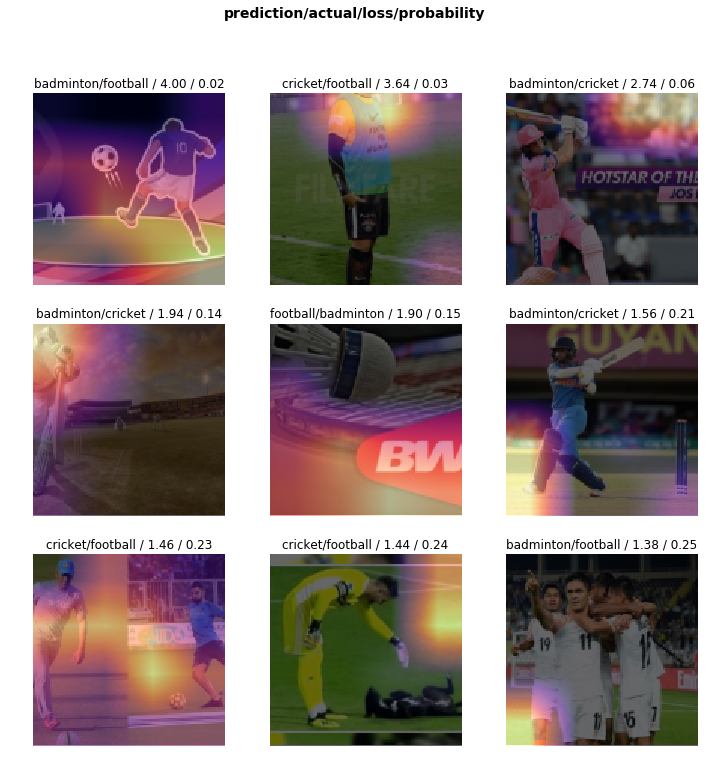

In [84]:
interp.plot_top_losses(9)

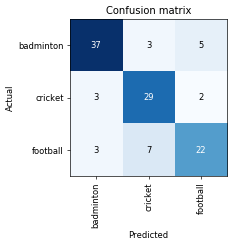

In [86]:
interp.plot_confusion_matrix(figsize=(4,4), dpi = 60)

In [87]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


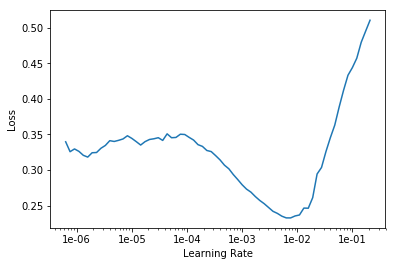

In [88]:
learn.recorder.plot()

In [89]:
learn.fit_one_cycle(2, max_lr=slice(1e-06,1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.421704,0.596665,0.189189,00:45
1,0.411885,0.462266,0.153153,00:36


In [90]:
learn.save('stage-2')


In [91]:
learn.load('stage-2');

In [95]:
interp = ClassificationInterpretation.from_learner(learn)

# Clean the Data

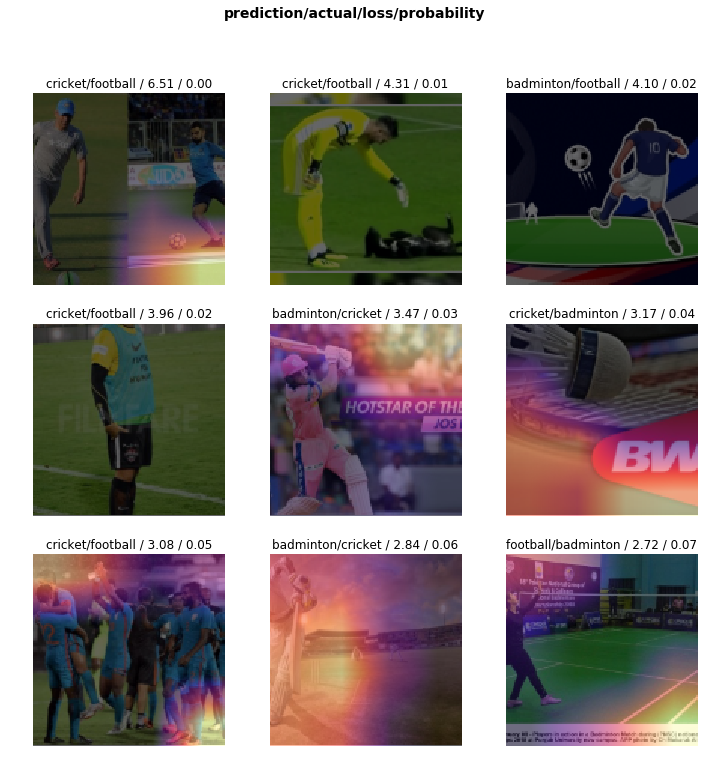

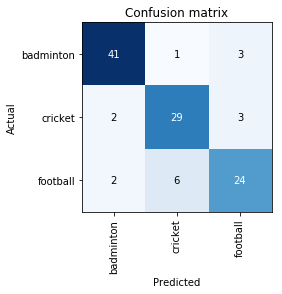

In [98]:
interp.plot_top_losses(9)
interp.plot_confusion_matrix()

In [99]:
learn.export()

# Run the model on a new Image

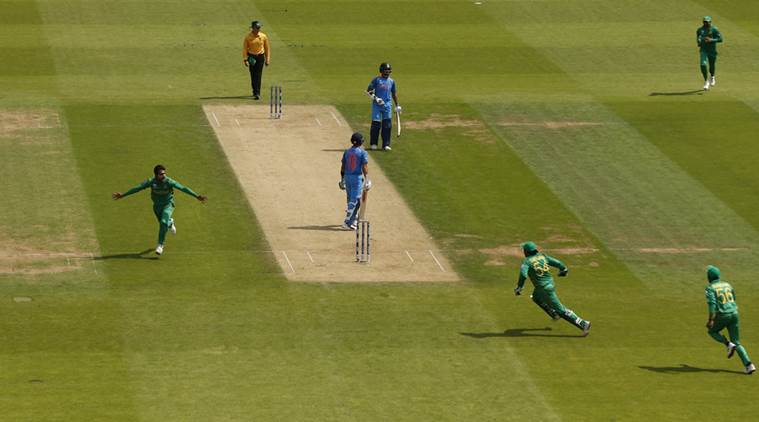

In [101]:
img  =  open_image(path/'6413.jpg')
img

In [102]:
learn = load_learner(path)

In [103]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)
print(pred_idx)
print(outputs)

Category cricket